**<h1>Email Spam Detection**

---
**<h1>Problem Definition**

**Problem:**

 **The goal of this project is to create a system that can classify emails as either "spam" or "ham".8**

* **Spam emails are unwanted messages that are usually for advertising or scams.**
* **Ham emails are regular, legitimate messages that are not spam.**


**The challenge is to accurately separate spam emails from regular ones using techniques from  machine learning models.**

---
**<h1>Why This Problem**

Email spam is a persistent and growing problem in digital communication. Every day, millions of spam emails are sent, and they often contain irrelevant content, unwanted advertisements, or malicious links. This results in a significant waste of time and resources for individuals and organizations.

Spam emails also pose a security threat, as they may contain phishing attempts or malware that can compromise sensitive information. Automating spam detection is crucial because it can improve user experience by filtering out unwanted emails, reduce the burden on manual email management, and enhance email security.

By solving this problem with a machine learning-based spam classification model, we can help users and organizations efficiently manage their inboxes and avoid the risks posed by spam emails.

---
 **<h1>Approach**

My approach involves the following steps:

 **<h3>1. Data Preprocessing**:

- Loading the dataset and handling missing data.
- Label encoding, where "ham" is labeled as 1 and "spam" is labeled as 0.
- Splitting the data into training and test datasets for model evaluation.

**<h3>2. Feature Extraction**:

- Using **TF-IDF Vectorizer** to convert the email messages into numerical data (features) that can be used by machine learning models. TF-IDF helps to capture the importance of words in the emails.

**<h3>3. Model Selection and Training**:

You used multiple models including:
- **Logistic Regression**
- **K-Nearest Neighbors**
- **Decision Tree Classifier**
- **Random Forest Classifier**

Each model is trained on the training data and evaluated on the test data.

 **<h3>4. Model Evaluation**:

- You evaluated the models using metrics such as **accuracy**, **precision**, **recall**, and **F1 score**.
- **Learning curves** were used to observe overfitting or underfitting tendencies.
- **Confusion matrices** were plotted for the best-performing model to visualize its predictions.

 **<h3>5. Model Selection**:

The model with the highest accuracy was chosen as the final model for making predictions on new data.

 **<h3>6. Prediction**:



Finally, the trained model was used to classify a sample email into spam or ham.
---


 **<h1>1.Importing Dependencies**
**This section imports all necessary libraries, including those for data manipulation (NumPy, pandas), machine learning models (scikit-learn), and visualization (Matplotlib, Seaborn).**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

**<h1>Mounting Google Drive**

**To access the dataset stored in Google Drive.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**<h1>Load Data from CSV File**

**Loading the dataset into a DataFrame to view its structure.**

In [ ]:
raw_mail_data = pd.read_csv('/content/drive/MyDrive/ml/spam_ham.csv')
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


**<h1> Handle Missing Values**

**Replacing any missing values in the data with empty strings to ensure smooth data processing.**

In [ ]:
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')



**<h3>Displaying the first five rows to understand the structure and content of the dataset.**

In [ ]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."



**<h3>Checking the dimensions of the dataset (rows and columns).**

In [ ]:
mail_data.shape

(5572, 2)

**<h2>Plotting a pie chart to visualize the distribution of 'ham' and 'spam' emails.**

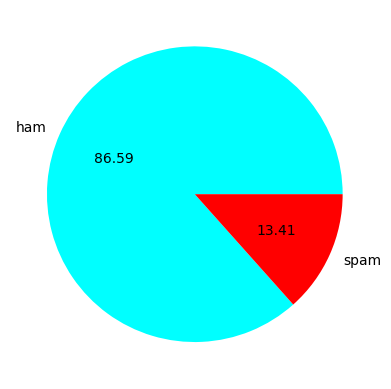

In [ ]:
plt.pie(mail_data['Category'].value_counts(),labels=['ham','spam'],autopct='%0.2f',colors=['cyan', 'red'])
plt.show()

**<h2> Label encoding: Setting spam = 0 and ham = 1 to prepare the data for modeling.**

In [ ]:
mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

spam  -  0

ham  -  1

In [ ]:
mail_data

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


**<h1>Target Variable Distribution**

**Using a count plot to analyze the distribution of spam and ham emails in the dataset.**

<ipython-input-10-da71489e406f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p=sns.countplot(x='Category',data=mail_data,palette=['red','green'])


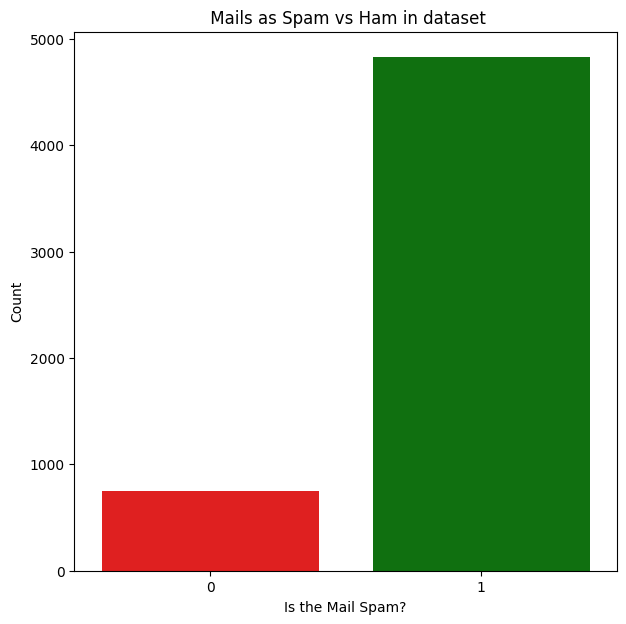

In [ ]:
plt.figure(figsize=(7,7))
p=sns.countplot(x='Category',data=mail_data,palette=['red','green'])

p=plt.title(' Mails as Spam vs Ham in dataset')
p=plt.xlabel('Is the Mail Spam?')
p=plt.ylabel('Count')

**<h1>Separate Text and Labels**

**Separating the feature data (Message) and target labels (Category).**

In [ ]:
X = mail_data['Message']

Y = mail_data['Category'].astype(int)

In [ ]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [ ]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64


**<h1>Splitting data into training and test sets for model evaluation.**


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


**<h1>Converting text data into numerical features using the TF-IDF Vectorizer.**

In [ ]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

**<h1>Top 20 Most Common Words in Spam Emails**

**Visualizing the 20 most common words in spam emails to gain insights into frequent spam keywords.**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


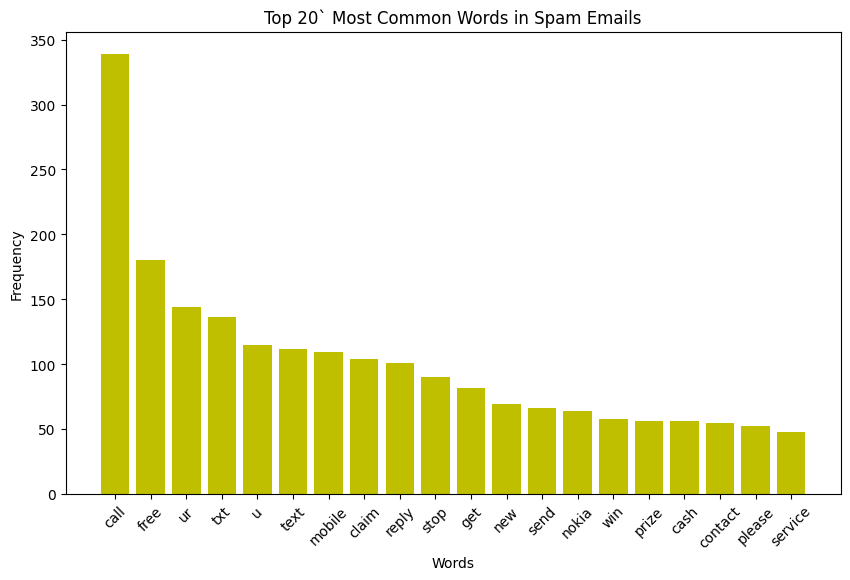

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

stop_words = set(stopwords.words('english'))

spam_words = " ".join(mail_data[mail_data['Category'] == 0]['Message']).split()


spam_word_freq = Counter([word.lower() for word in spam_words if word.lower() not in stop_words and word.isalpha()])


plt.figure(figsize=(10, 6))
plt.bar(*zip(*spam_word_freq.most_common(20)), color='y')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20` Most Common Words in Spam Emails')
plt.xticks(rotation=45)
plt.show()


**<h1>Top 20 Most Common Words in Ham Emails**

**Visualizing the 20 most common words in ham emails.**

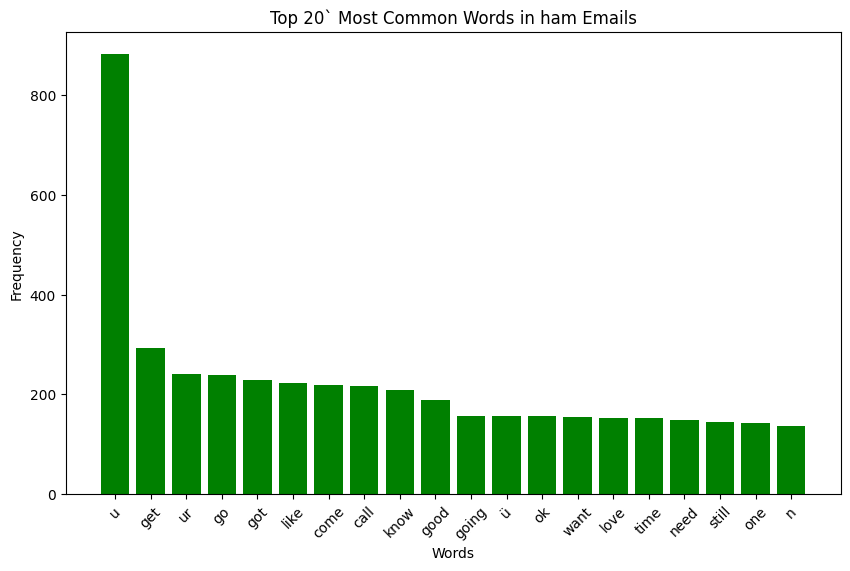

In [ ]:
stop_words = set(stopwords.words('english'))

ham_words = " ".join(mail_data[mail_data['Category'] == 1]['Message']).split()


ham_word_freq = Counter([word.lower() for word in ham_words if word.lower() not in stop_words and word.isalpha()])


plt.figure(figsize=(10, 6))
plt.bar(*zip(*ham_word_freq.most_common(20)), color='g')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20` Most Common Words in ham Emails')
plt.xticks(rotation=45)
plt.show()

**<h1> Word cloud for spam messages**

**Generating a word cloud to visualize common words in spam emails.**

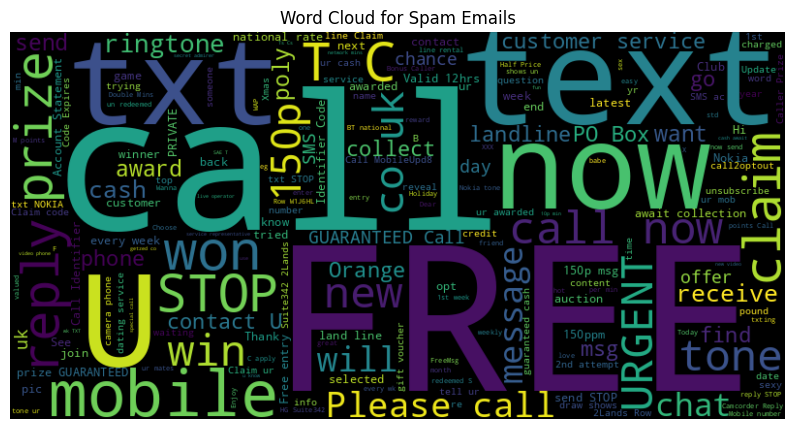

In [ ]:
from wordcloud import WordCloud

spam_text = " ".join(mail_data[mail_data['Category'] == 0]['Message'])
spam_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(spam_text)
plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails')
plt.show()
print("")



**<h1>Word cloud for ham messages**

**Generating a word cloud to visualize common words in ham emails.**

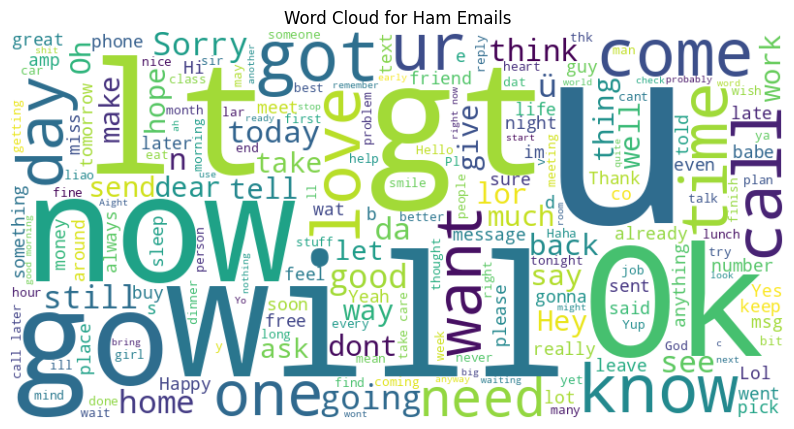

In [ ]:
ham_text = " ".join(mail_data[mail_data['Category'] == 1]['Message'])
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

plt.figure(figsize=(10, 6))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Emails')
plt.show()


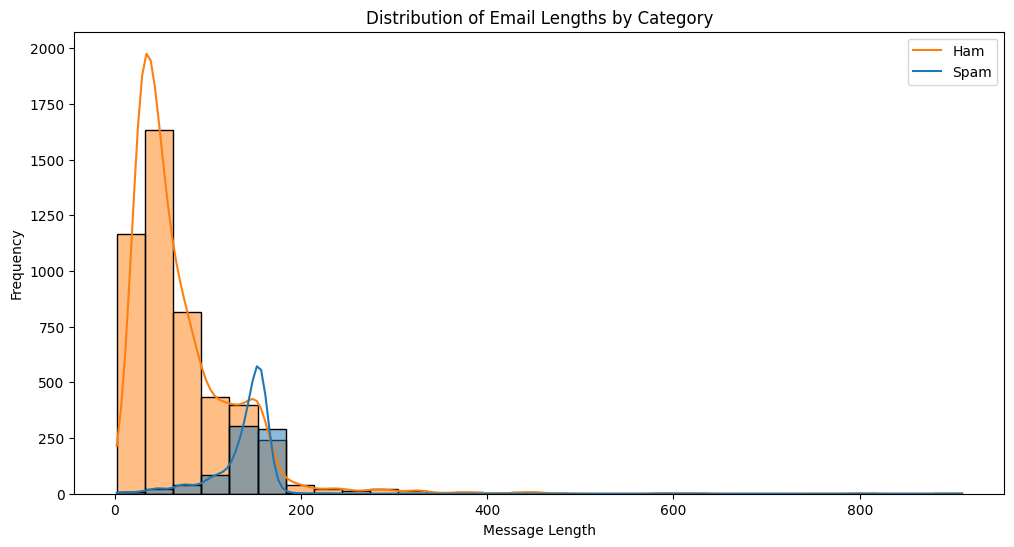

In [ ]:
mail_data['Message_Length'] = mail_data['Message'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(data=mail_data, x='Message_Length', hue='Category', bins=30, kde=True)
plt.title('Distribution of Email Lengths by Category')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend(['Ham', 'Spam'])
plt.show()


**<h1> Defining and training four different classifiers**


**<h4>1. Logistic Regression**

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train_features, Y_train)

LogisticRegression()

**<h4>2. K-Nearest Neighbors**

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_features, Y_train)

KNeighborsClassifier()

**<h4>3. Decision Tree Classifier**

In [ ]:
model_dt = DecisionTreeClassifier(random_state=3)
model_dt.fit(X_train_features, Y_train)

DecisionTreeClassifier(random_state=3)

**<h4>4. Random Forest Classifier**

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=3)
model_rf.fit(X_train_features, Y_train)

RandomForestClassifier(random_state=3)

**<h1>Evaluating the Models**

**Evaluating each model's performance using accuracy, precision, recall, and F1 score.**



In [ ]:
models = {'Logistic Regression': model_lr, 'K-Nearest Neighbors': model_knn, 'Decision Tree': model_dt,'Random Forest': model_rf }
results = []

for model_name, model in models.items():

    Y_pred = model.predict(X_test_features)


    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)


    results.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1})

results_df = pd.DataFrame(results)
print("Model Performance Comparison:")
print(results_df)

Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.966816   0.962889  1.000000  0.981094
1  K-Nearest Neighbors  0.909417   0.904807  1.000000  0.950025
2        Decision Tree  0.963229   0.962739  0.995833  0.979007
3        Random Forest  0.976682   0.973631  1.000000  0.986639


**<h2>Plotting learning curves to observe training and testing performance across different training sizes.**

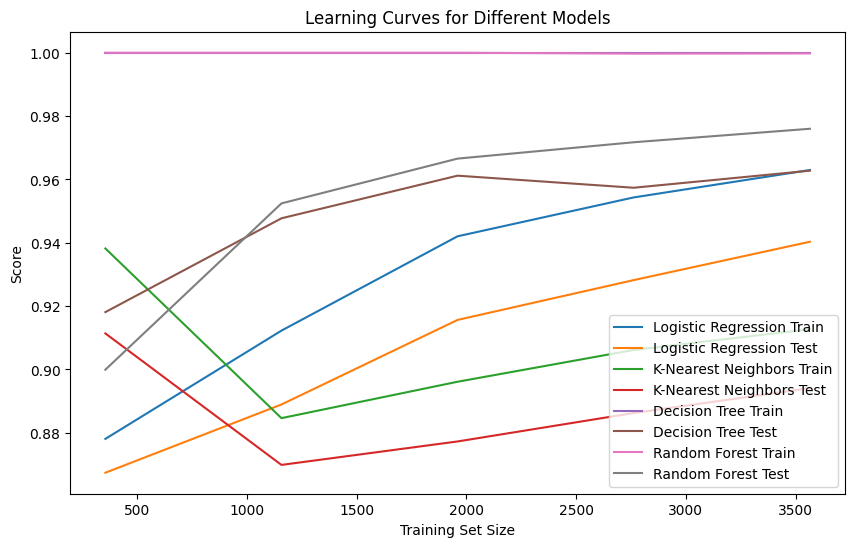

In [ ]:
from sklearn.model_selection import learning_curve

plt.figure(figsize=(10, 6))
for model_name, model in models.items():
    train_sizes, train_scores, test_scores = learning_curve(model, X_train_features, Y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label=f'{model_name} Train')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label=f'{model_name} Test')

plt.title("Learning Curves for Different Models")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.legend()
plt.show()


**<h4>Measuring the time taken to train each model and displaying the results to understand which models are faster or slower to train.**

In [ ]:
import time
model_times = {}
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train_features, Y_train)
    end_time = time.time()
    model_times[model_name] = end_time - start_time

# Displaying training times
for model_name, time_taken in model_times.items():
    print(f"{model_name}: {time_taken:.2f} seconds")


Logistic Regression: 0.04 seconds
K-Nearest Neighbors: 0.00 seconds
Decision Tree: 0.31 seconds
Random Forest: 1.48 seconds


**<h1>hoosing the Best Model Based on Accuracy**

In [ ]:
best_model_name = results_df.loc[results_df['Accuracy'].idxmax()]['Model']
print(f"\nBest Model: {best_model_name}")


Best Model: Random Forest


**<h1>Confusion Matrix for the Best Model**

**Displaying the confusion matrix for the best model to evaluate the model’s performance in terms of true and false predictions for each class (spam and ham).**

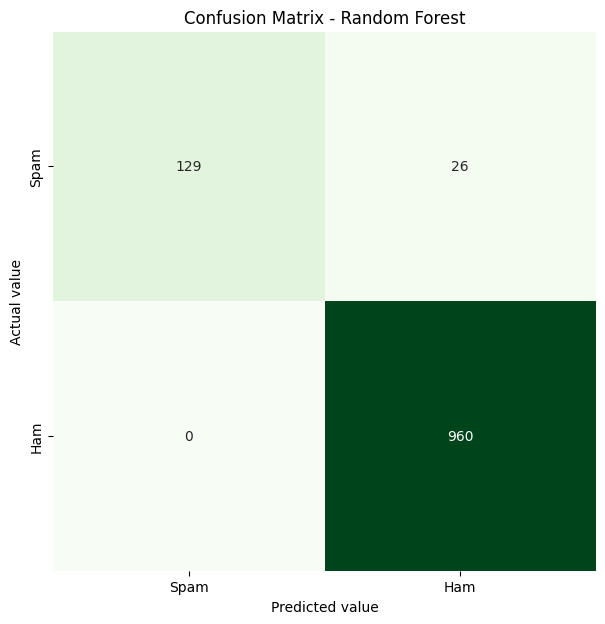

In [ ]:
best_model = models[best_model_name]
Y_pred_best = best_model.predict(X_test_features)

conf_matrix = confusion_matrix(Y_test, Y_pred_best)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False, xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

**<h1>Displaying Best Model's Performance Metrics**

In [ ]:
best_metrics = results_df[results_df['Model'] == best_model_name]
print("Best Model Performance:")
print(best_metrics)

Best Model Performance:
           Model  Accuracy  Precision  Recall  F1 Score
3  Random Forest  0.976682   0.973631     1.0  0.986639


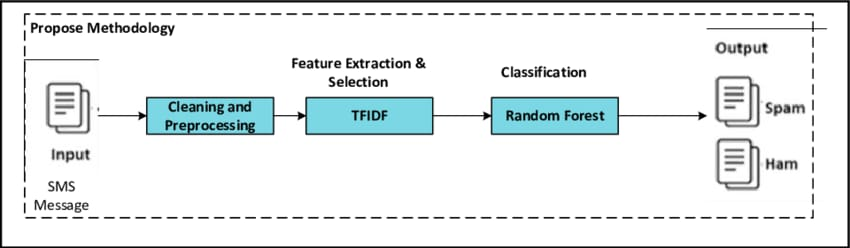

**<h1>Predictive System Using the Best Model**

**Creating a predictive system using the best model, where we input a sample email message and receive a prediction of whether it is spam or ham.**

In [ ]:
input_mail = ["Feeling hungry? Order online and win a coupon for cash prize."]

input_data_features = feature_extraction.transform(input_mail)


prediction = best_model.predict(input_data_features)

if prediction[0] == 1:
    print('Ham mail')
else:
    print('Spam mail')

Spam mail


Feeling hungry? Order online and win a coupon for cash prize.